In [96]:
import os
import numpy as np
import pandas as pd
from datetime import timedelta, datetime

import matplotlib.pyplot as plt

import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [97]:
FORBES = './stock_market_data/sp500/csv/'
TICKER = 'AAPL'
PATH = os.path.join(FORBES, f"{TICKER}.csv")

In [136]:
df = pd.read_csv(PATH)
df['Date'] = pd.to_datetime(df['Date'])

In [137]:
df.drop(['Date', 'Volume'], axis=1, inplace=True)

In [138]:
df.describe()

,Low,Open,High,Close,Adjusted Close
count,10479.000000,10479.000000,10479.000000,10479.000000,10479.000000
mean,14.722808,14.887513,15.053329,14.893931,14.261494
std,31.775091,32.146865,32.527577,32.165366,31.878213
min,0.049107,0.049665,0.049665,0.049107,0.038329
25%,0.276786,0.283482,0.290000,0.283482,0.235613
50%,0.466518,0.475446,0.484375,0.475446,0.393155
75%,14.923214,15.015000,15.121250,15.006250,12.913671
max,179.119995,182.630005,182.940002,182.009995,181.511703


In [139]:
x = df.iloc[-8:].values

In [140]:
x.shape

(8, 5)

In [141]:
x = np.rint(x)

In [229]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

In [289]:
def make_color_gradient_plot(x, title: str, vmin: int, vmax: int, lbls = ['Low', 'Open', 'High', 'Close', 'Adjusted Close'], cmap: str = 'autumn'):
    assert x.shape[1] == len(lbls), 'Labels need to be the same length as the type of values in x'
    f, ax = plt.subplots(x.shape[1], 1, figsize=(11, 6), dpi=150)
    f.suptitle(title, fontsize=16)
    for i in range(x.shape[1]):
        ax[i].imshow(x[:, 0].reshape(1, x.shape[0]), cmap=cmap, vmin=vmin, vmax=vmax)
        ax[i].set_ylabel(lbls[i], rotation=0, labelpad=40)
        ax[i].xaxis.set_visible(False)
        ax[i].yaxis.set_ticks([])

    return f

In [290]:
def make_color_gradient_compare_plot(x, y_true, y_pred, name: str = "color_gradient.png"):
    path = os.path.join('results', name)

    x_true = np.vstack((x, y_true))
    g_true = make_color_gradient_plot(x_true, 'actual', np.min(x_true), np.max(x_true))
    w, h = g_true.get_size_inches() * g_true.get_dpi()
    w, h = int(w), int(h)
    canvas = FigureCanvas(g_true)
    canvas.draw()
    im_true = np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(h, w, 3)
    
    x_pred = np.vstack((x, y_pred))
    g_pred = make_color_gradient_plot(np.vstack(x_pred), 'prediction', np.min(x_true), np.max(x_true))
    w, h = g_pred.get_size_inches() * g_pred.get_dpi()
    w, h = int(w), int(h)
    canvas = FigureCanvas(g_pred)
    canvas.draw()
    im_pred = np.frombuffer(canvas.tostring_rgb(), dtype='uint8').reshape(h, w, 3)

    im_comb = Image.fromarray(np.vstack((im_true, im_pred)))
    
    im_comb.save(path)

    return path

'results\\color_gradient.png'

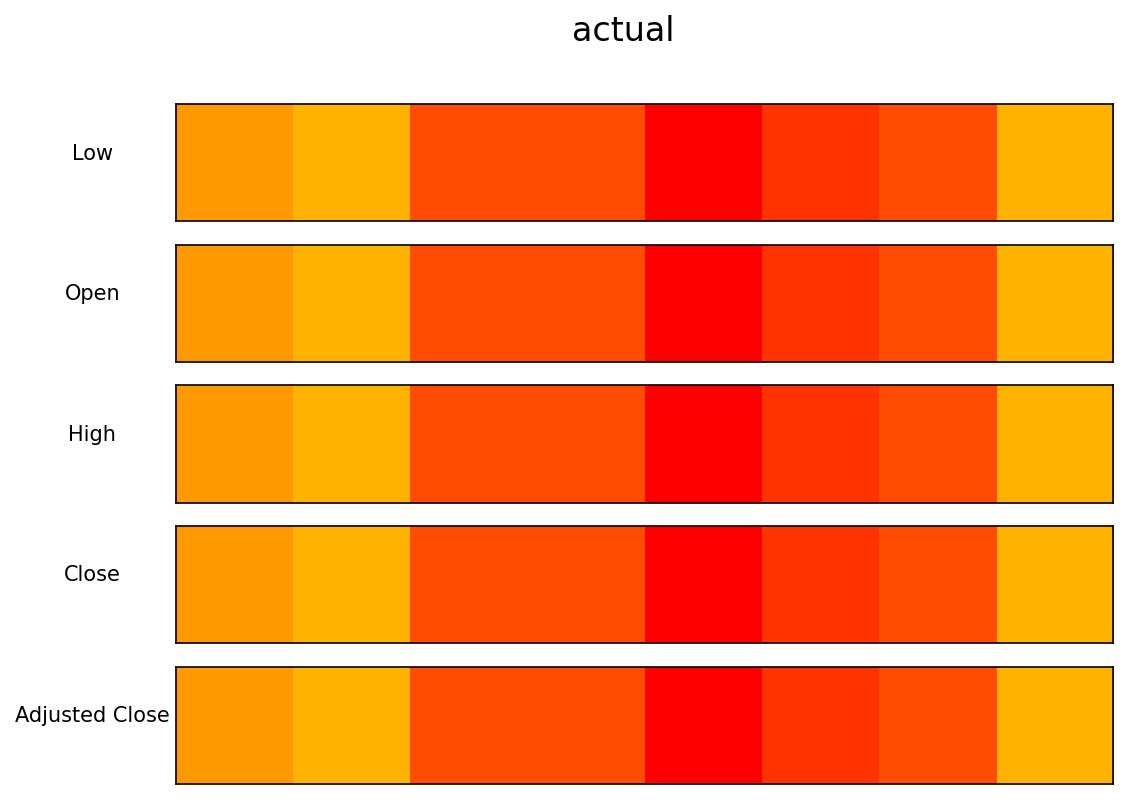

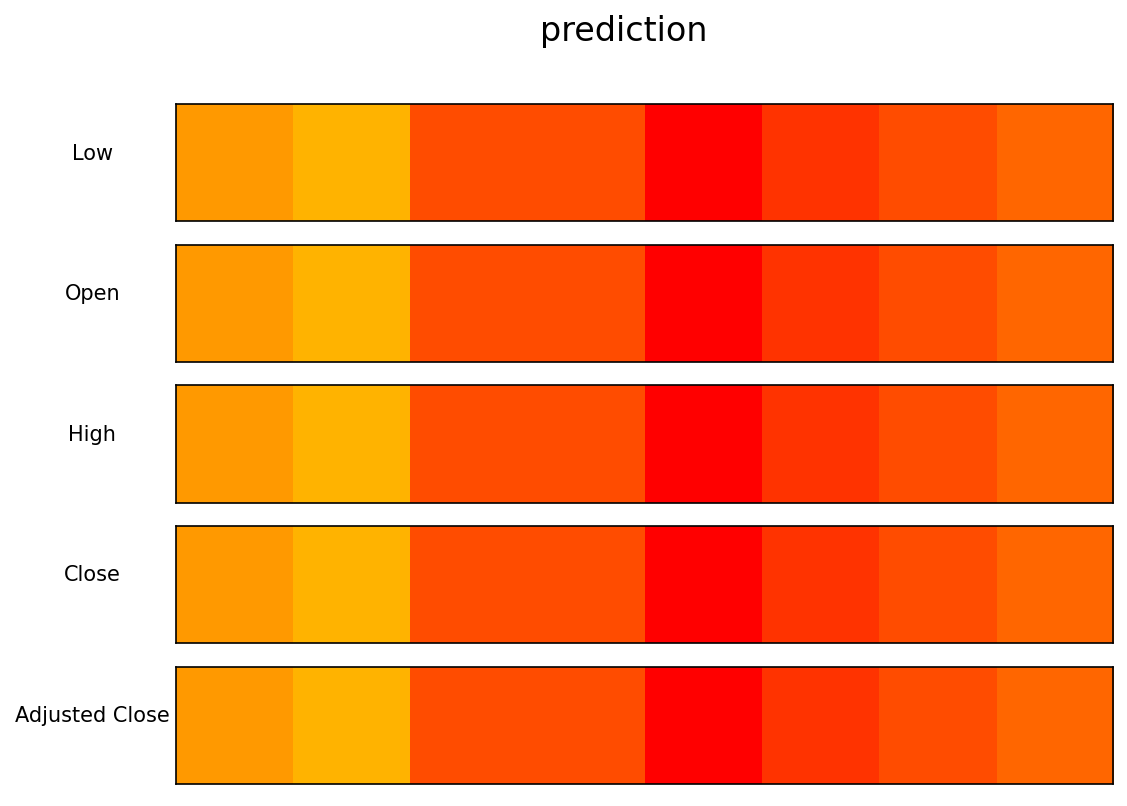

In [291]:
make_color_gradient_compare_plot(x[:-1], x[-1:], np.random.randint(100, 170, size=(1, 5)))

In [ ]:
x[:-1]

array([[140., 140., 142., 142., 142.],
       [141., 143., 143., 142., 142.],
       [137., 142., 143., 137., 137.],
       [137., 137., 141., 139., 139.],
       [134., 137., 138., 137., 137.],
       [136., 136., 139., 139., 139.],
       [137., 138., 142., 142., 142.]])

In [174]:
x.shape

(8, 5)

In [124]:
x[:, 0].reshape(x.shape[0], 1)

array([[140.],
       [141.],
       [137.],
       [137.],
       [134.],
       [136.],
       [137.],
       [141.]])